Colab [Link](https://colab.research.google.com/drive/1VYwfWb0PK5-hce2hovJ2aAseEhy68tWb?usp=sharing)

# **Kenya Loan Default Prediction**
**Team 6: Bruce Liu, Grace Kung, Emily Su, Allen Chiu**

BA810 Supervised Machine Learning (Fall 2025)

Boston University, Questrom School of Business

>[Kenya Loan Default Prediction](#scrollTo=qDvBiKDUccca)

>[1. Executive Summary](#scrollTo=D16YxEvvabqj)

>[2. Data Source](#scrollTo=l0WAeT9gaTCs)

>>[2.1 Kenya Loan Dataset](#scrollTo=fHdTrwrUaW0k)

>>[2.2 Kenya Monthly Economic Indicators](#scrollTo=QFs3EUO_aYwX)

>>[2.3 Data Dictionary](#scrollTo=K-vilv0vkmnR)

>[3. Problem Definition](#scrollTo=nwsb3yG_eP5G)

>[4. Data Cleaning](#scrollTo=o8W_s7SuedZ7)

>>[4.1 Explore Data](#scrollTo=g8o6O5E2eWDn)

>>[4.2 Pairplots](#scrollTo=bhqqcbzQtWeH)

>>[4.3 Correlation Matrix](#scrollTo=dsVskEohvC5y)

>>[4.4 Distribution](#scrollTo=tnL39WnyecZm)

>>[4.5 Indication](#scrollTo=trzlwwOiiqAn)

>[5. Preprocessing and Feature Engineering](#scrollTo=nL7z7xpxbcat)

>>[5.1 Train-Test Split](#scrollTo=DneX_jMeeaAo)

>>[5.2 Preprocessing](#scrollTo=3ILfz2QWKDOL)

>>[5.3 Feature Engineering](#scrollTo=GlELjq7pwYiq)

>>[5.4 Pipeline](#scrollTo=ZsZVQuSR2wUi)

>[6. Model Training and Evaluation](#scrollTo=5XNk4P7nczLv)

>>[6.1 Logistic Regression](#scrollTo=51MB2Ly8lNe8)

>>[6.2 KNeighborsClassifier](#scrollTo=kmYsn2i8z-mW)

>>[6.3 GaussianNB](#scrollTo=26yIq-GN25St)

>>[6.4 DecisionTreeClassifier](#scrollTo=2-Cf6Ntm6439)

>>[6.5 RandomForestClassifier](#scrollTo=dbC8xlTN69uk)

>>[6.6 BaggingClassifier](#scrollTo=aksLiU447Cos)

>>[6.7 Linear SVM](#scrollTo=NdDoS4Dp7IVz)

>>[6.8 GradientBoosting](#scrollTo=lRFvceyj_GTE)

>>[6.9 Model Comparison](#scrollTo=DHZROik8_MbM)

>[7. Hyperparameter Tuning and Stacking](#scrollTo=m2-2m3dZTZML)

>>[7.1 GaussianNB](#scrollTo=e_fXt5ISUA8L)

>>[7.2 Logistic Regression](#scrollTo=oQkyKamjUmMf)

>>[7.3 GradientBoosting](#scrollTo=ylXepzQkUIZA)

>>[7.4 Stack models after Tuning](#scrollTo=nDX0tS0t-bYR)

>[8. Threshold Tuning](#scrollTo=8-WLjIjtzhs1)

>[9. Final Evaluation](#scrollTo=PwOZSdZ15CrT)

>[10. Challenges and Next Steps](#scrollTo=PEh5RpCqdCHk)

>>>[10.1 Estimated Cost Matrix](#scrollTo=XCHSjLOioSfd)

>>>[10.2 Data Quality Issues](#scrollTo=pgOVNRJOod0k)

>>>[10.3 Model Complexity and Generalization Trade-offs](#scrollTo=dQY7YySmoqcS)

>>>[10.4 Evaluation Limitations](#scrollTo=AIQQ9LFLq5Y4)

>>>[10.5 Hyperparameter Tuning Search Limitations](#scrollTo=ECCDeqVfq_95)

>[11. Conclusion](#scrollTo=oH6D40b7dPVS)

>[12. References](#scrollTo=7XXiIaTgdU5I)

>[13. Generative AI Disclosure](#scrollTo=oF7ILRYBH_90)



# **1. Executive Summary**

This project focuses on building a machine-learning model to predict whether a borrower will default on a credit-card loan. Using the Zindi credit-risk dataset, we explored the data, engineered features, and trained multiple classification models to understand which approaches performed best. Our evaluation combined standard accuracy metrics with a cost-sensitive framework to reflect the real financial consequences of misclassifying borrowers. Because the cost matrix was based on estimated values, the results highlight both the potential of cost-aware modeling and the need for real-world cost data in future iterations.

The model performs reasonably well in distinguishing high-risk and low-risk borrowers, offering useful guidance for lenders seeking to reduce losses while maintaining fair access to credit. At the same time, the analysis reveals challenges related to data quality, feature interactions, and model generalization, all of which influence overall performance. These findings emphasize the importance of careful data handling, ongoing model tuning, and responsible evaluation when applying machine learning to financial decision-making.

Overall, this project demonstrates how predictive modeling can support lenders, borrowers, and government stakeholders in creating a more stable, fair, and informed credit system. The results serve as a strong foundation for further improvements, including the use of real operational cost data, more advanced feature engineering, and broader evaluation strategies.

# **2. Data Source**

##**2.1 Kenya Loan Dataset**

* **License Information**:
The dataset used in this study was obtained from the African Credit Scoring Challenge hosted on Zindi. Access to the dataset requires agreement to the platform’s official Terms of Use and Competition Rules, which govern data usage, redistribution, and publication. The dataset is not publicly licensed (e.g., not under CC, MIT, or other open-source licenses). Users must comply with all restrictions defined by the competition organizers, and redistribution of the data is strictly prohibited unless explicitly permitted by the original terms.

* **Access Instruction**: To access the dataset, users must accept terms of use on [Zindi African Credit Scoring Challenge](https://zindi.africa/competitions/african-credit-scoring-challenge/data).


##**2.2 Kenya Monthly Economic Indicators**

* **License Information**:
This dataset originates from the Central Bank of Kenya’s Monthly Economic Indicators publication. The data is published by CBK and made publicly available on its website. There is no explicit open-data license (e.g., CC BY, MIT) clearly stated on the webpage. Therefore, usage of this data must comply with any usage restrictions or terms set by CBK. Redistribution, reuse, or publication should respect CBK’s rights and any stated disclaimers on the website.

* **Access Instruction**: The dataset is publicly accessible and can be downloaded from [Central Bank of Kenya](https://www.centralbank.go.ke/monthly-economic-indicators/)

##**2.3 Data Dictionary**
Data Size: 66854 rows x 26 columns

| Column Name                     | Data Type       | Description |
|----------------------------------|------------------|-------------|
| ID                               | int64            | A unique identifier for each entry in the dataset. |
| customer_id                      | int64            | Unique identifier for each customer in the dataset. |
| country_id                       | object           | Identifier or code representing the country where the customer resides or where the loan was issued. |
| tbl_loan_id                      | int64            | Unique identifier for each loan associated with the customer. |
| lender_id                        | int64            | Unique identifier for the lender or institution that issued the loan. |
| loan_type                        | object           | The category or type of loan. |
| Total_Amount                     | float64          | The total loan amount initially disbursed to the customer. |
| Total_Amount_to_Repay            | float64          | The total amount the customer is expected to repay, including principal, interest, and fees. |
| disbursement_date                | datetime64[ns]   | The date when the loan amount was disbursed to the customer. |
| due_date                         | object           | The date by which the loan repayment is due. |
| duration                         | int64            | The length of the loan term, typically expressed in days. |
| New_vs_Repeat                    | object           | Indicates whether the loan is the customer's first loan ("New") or if the customer has taken loans before ("Repeat"). |
| Amount_Funded_By_Lender          | float64          | The portion of the loan funded directly by the lender. |
| Lender_portion_Funded            | float64          | Percentage of the total loan amount funded by the lender. |
| Lender_portion_to_be_repaid      | float64          | The portion of the outstanding loan that needs to be repaid to the lender. |
| target                           | int64            | This variables takes the value 0 or 1. 1 means the customer defaulted on the loan, whereas 0 means, the customer paid the loan. |
| year                             | int32            | Year of the loan record. |
| month                            | int32            | Month of the loan record. |
| overall_inflation                | float64          | Monthly inflation indicator. |
| CBR_interest_rates               | float64          | Central Bank Reference interest rate. |
| avg_exchange_rates_to_USD        | float64          | Average monthly exchange rate (KES to USD). |
| total_assets_of_banking_KSh_B    | float64          | Total banking sector assets (in billions KSh). |
| external_debt_ratio              | float64          | External debt ratio for the period. |
| total_domestic_debt              | float64          | Total domestic debt level. |
| market_capitalization_KSh_B      | float64          | Market capitalization (in billions KSh). |
| bond_volume_KSh_M                | float64          | Bond market volume (in millions KSh). |

# **3. Problem Definition**
The primary objective of the project is to develop a model to predict loan defaults, providing insights that would allow stakeholders to make informed decisions about loan approval, management, and regulation. This predictive model would identify high-risk borrowers, enabling financial institutions to better assess risk, set appropriate loan terms, and avoid financial losses.


# **4. Data Cleaning**

In [ ]:
# Load Data
import pandas as pd
loan = pd.read_csv('https://raw.githubusercontent.com/whkung0903/kenya-loan-credit-prediction/main/loan_raw.csv')
economics = pd.read_csv('https://raw.githubusercontent.com/whkung0903/kenya-loan-credit-prediction/main/Kenya%20Monthly%20Economic%20Indicators.csv')

# merge datasets
loan['disbursement_date'] = pd.to_datetime(loan['disbursement_date'], errors='coerce')
loan['year'] = loan['disbursement_date'].dt.year
loan['month'] = loan['disbursement_date'].dt.month

full = pd.merge(loan, economics, on=['year', 'month'], how='left')
full.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,...,year,month,overall_inflation,CBR_interest_rates,avg_exchange_rates_to_USD,total_assets_of_banking_KSh_B,external_debt_ratio,total_domestic_debt,market_capitalization_KSh_B,bond_volume_KSh_M
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,...,2022,8,8.53,7.50,119.45,6383.8,49.96,4335.3,2142.12,68356.38
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,...,2022,7,8.32,7.50,118.32,6345.9,49.94,4310.7,2198.26,61862.67
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,...,2024,9,3.56,12.75,129.20,7568.4,48.10,5601.7,1676.24,132523.85
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,...,2022,10,9.59,8.25,121.03,6388.6,49.85,4386.1,2006.85,56684.64
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,...,2022,11,9.48,8.75,121.90,6460.8,50.15,4435.9,1970.63,53617.16


Load Data with Github Repository

In [ ]:
import pandas as pd

base = "https://raw.githubusercontent.com/whkung0903/kenya-loan-credit-prediction/main/"

loan_url = base + "loan_raw.csv"
kenya_url = base + "Kenya%20Monthly%20Economic%20Indicators.csv"
full_url = base + "full.csv"

loan = pd.read_csv(loan_url)
economic = pd.read_csv(kenya_url)
full = pd.read_csv(full_url)

print("Loan raw shape:", loan.shape)
print("Kenya indicators shape:", economic.shape)
print("Full merged shape:", full.shape)

loan.head(), economic.head(), full.head()


Loan raw shape: (68654, 16)
Kenya indicators shape: (36, 10)
Full merged shape: (68615, 26)


(                      ID  customer_id country_id  tbl_loan_id  lender_id  \
 0  ID_266671248032267278       266671      Kenya       248032     267278   
 1  ID_248919228515267278       248919      Kenya       228515     267278   
 2  ID_308486370501251804       308486      Kenya       370501     251804   
 3  ID_266004285009267278       266004      Kenya       285009     267278   
 4  ID_253803305312267278       253803      Kenya       305312     267278   
 
   loan_type  Total_Amount  Total_Amount_to_Repay disbursement_date  \
 0    Type_1        8448.0                 8448.0        2022-08-30   
 1    Type_1       25895.0                25979.0        2022-07-30   
 2    Type_7        6900.0                 7142.0        2024-09-06   
 3    Type_1        8958.0                 9233.0        2022-10-20   
 4    Type_1        4564.0                 4728.0        2022-11-28   
 
      due_date  duration New_versus_Repeat  Amount_Funded_By_Lender  \
 0  2022-09-06         7       Repeat

In [ ]:
# drop rows with no economic indicators
econ_cols = [
    'overall_inflation',
    'CBR_interest_rates',
    'avg_exchange_rates_to_USD',
    'total_assets_of_banking_KSh_B',
    'external_debt_ratio',
    'total_domestic_debt',
    'market_capitalization_KSh_B',
    'bond_volume_KSh_M'
]

full = full.dropna(subset=econ_cols)

## **4.1 Explore Data**

In [ ]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68615 entries, 0 to 68614
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             68615 non-null  object 
 1   customer_id                    68615 non-null  int64  
 2   country_id                     68615 non-null  object 
 3   tbl_loan_id                    68615 non-null  int64  
 4   lender_id                      68615 non-null  int64  
 5   loan_type                      68615 non-null  object 
 6   Total_Amount                   68615 non-null  float64
 7   Total_Amount_to_Repay          68615 non-null  float64
 8   disbursement_date              68615 non-null  object 
 9   due_date                       68615 non-null  object 
 10  duration                       68615 non-null  int64  
 11  New_versus_Repeat              68615 non-null  object 
 12  Amount_Funded_By_Lender        68615 non-null 

In [ ]:
full.head(3)

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,...,year,month,overall_inflation,CBR_interest_rates,avg_exchange_rates_to_USD,total_assets_of_banking_KSh_B,external_debt_ratio,total_domestic_debt,market_capitalization_KSh_B,bond_volume_KSh_M
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,...,2022,8,8.53,7.50,119.45,6383.8,49.96,4335.3,2142.12,68356.38
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,...,2022,7,8.32,7.50,118.32,6345.9,49.94,4310.7,2198.26,61862.67
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,...,2024,9,3.56,12.75,129.20,7568.4,48.10,5601.7,1676.24,132523.85


In [ ]:
full.describe()

,customer_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target,year,month,overall_inflation,CBR_interest_rates,avg_exchange_rates_to_USD,total_assets_of_banking_KSh_B,external_debt_ratio,total_domestic_debt,market_capitalization_KSh_B,bond_volume_KSh_M
count,68615.000000,68615.000000,68615.000000,6.861500e+04,6.861500e+04,68615.000000,6.861500e+04,68615.000000,6.861500e+04,68615.000000,68615.000000,68615.000000,68615.000000,68615.000000,68615.000000,68615.000000,68615.000000,68615.000000,68615.000000,68615.000000
mean,254424.381520,263144.853720,266432.047293,1.483925e+04,1.564231e+04,8.535131,2.541732e+03,0.218272,2.648281e+03,0.018028,2022.104642,8.781054,8.709491,8.243985,120.889595,6457.967853,49.915777,4422.293153,2045.373820,64580.492090
std,26528.301486,39322.347271,3559.145669,1.416901e+05,1.651252e+05,13.339540,1.192473e+04,0.128629,1.338238e+04,0.133054,0.424576,1.630283,1.251418,1.071939,3.968152,266.951681,0.662378,259.941781,135.691081,15073.312361
min,145.000000,109684.000000,245684.000000,2.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,2022.000000,1.000000,2.720000,7.000000,113.380000,5978.000000,46.900000,4110.100000,1383.610000,36194.350000
25%,248952.000000,233978.000000,267278.000000,2.295000e+03,2.327500e+03,7.000000,2.337000e+02,0.118344,2.390000e+02,0.000000,2022.000000,8.000000,8.530000,7.500000,119.450000,6383.800000,49.820000,4335.300000,2000.820000,56684.640000
50%,255361.000000,260333.000000,267278.000000,5.249000e+03,5.320000e+03,7.000000,9.147000e+02,0.300000,9.330000e+02,0.000000,2022.000000,9.000000,9.180000,8.250000,120.420000,6388.600000,49.940000,4366.300000,2006.850000,61862.670000
75%,262275.000000,286974.500000,267278.000000,1.145500e+04,1.165150e+04,7.000000,2.268000e+03,0.300000,2.314000e+03,0.000000,2022.000000,10.000000,9.480000,8.250000,121.030000,6415.100000,49.960000,4386.100000,2142.120000,66741.950000
max,312737.000000,375320.000000,267278.000000,2.300000e+07,2.541500e+07,1096.000000,1.600000e+06,1.168119,1.821338e+06,1.000000,2024.000000,12.000000,9.590000,13.000000,159.690000,7793.600000,55.100000,5808.800000,2543.440000,271247.460000


## **4.2 Pairplots**

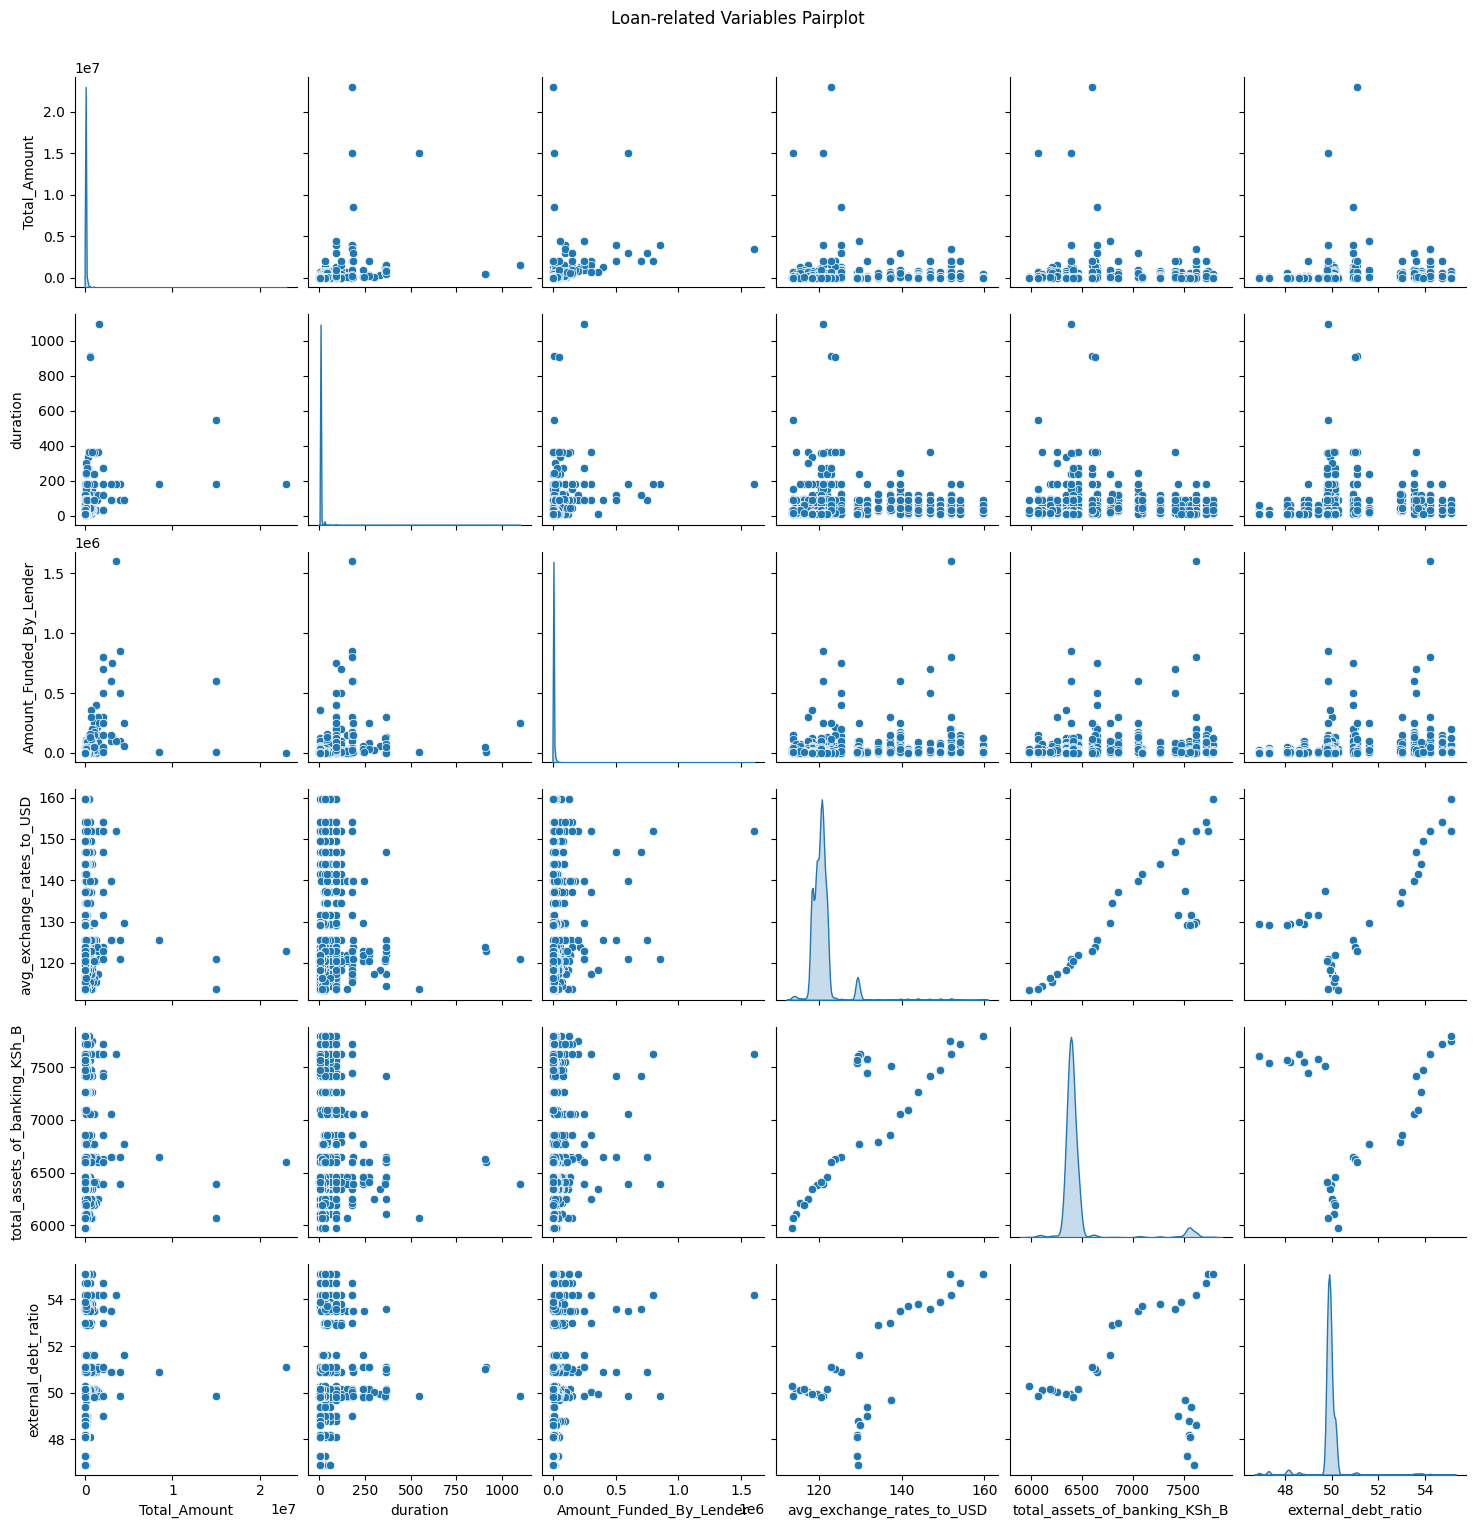

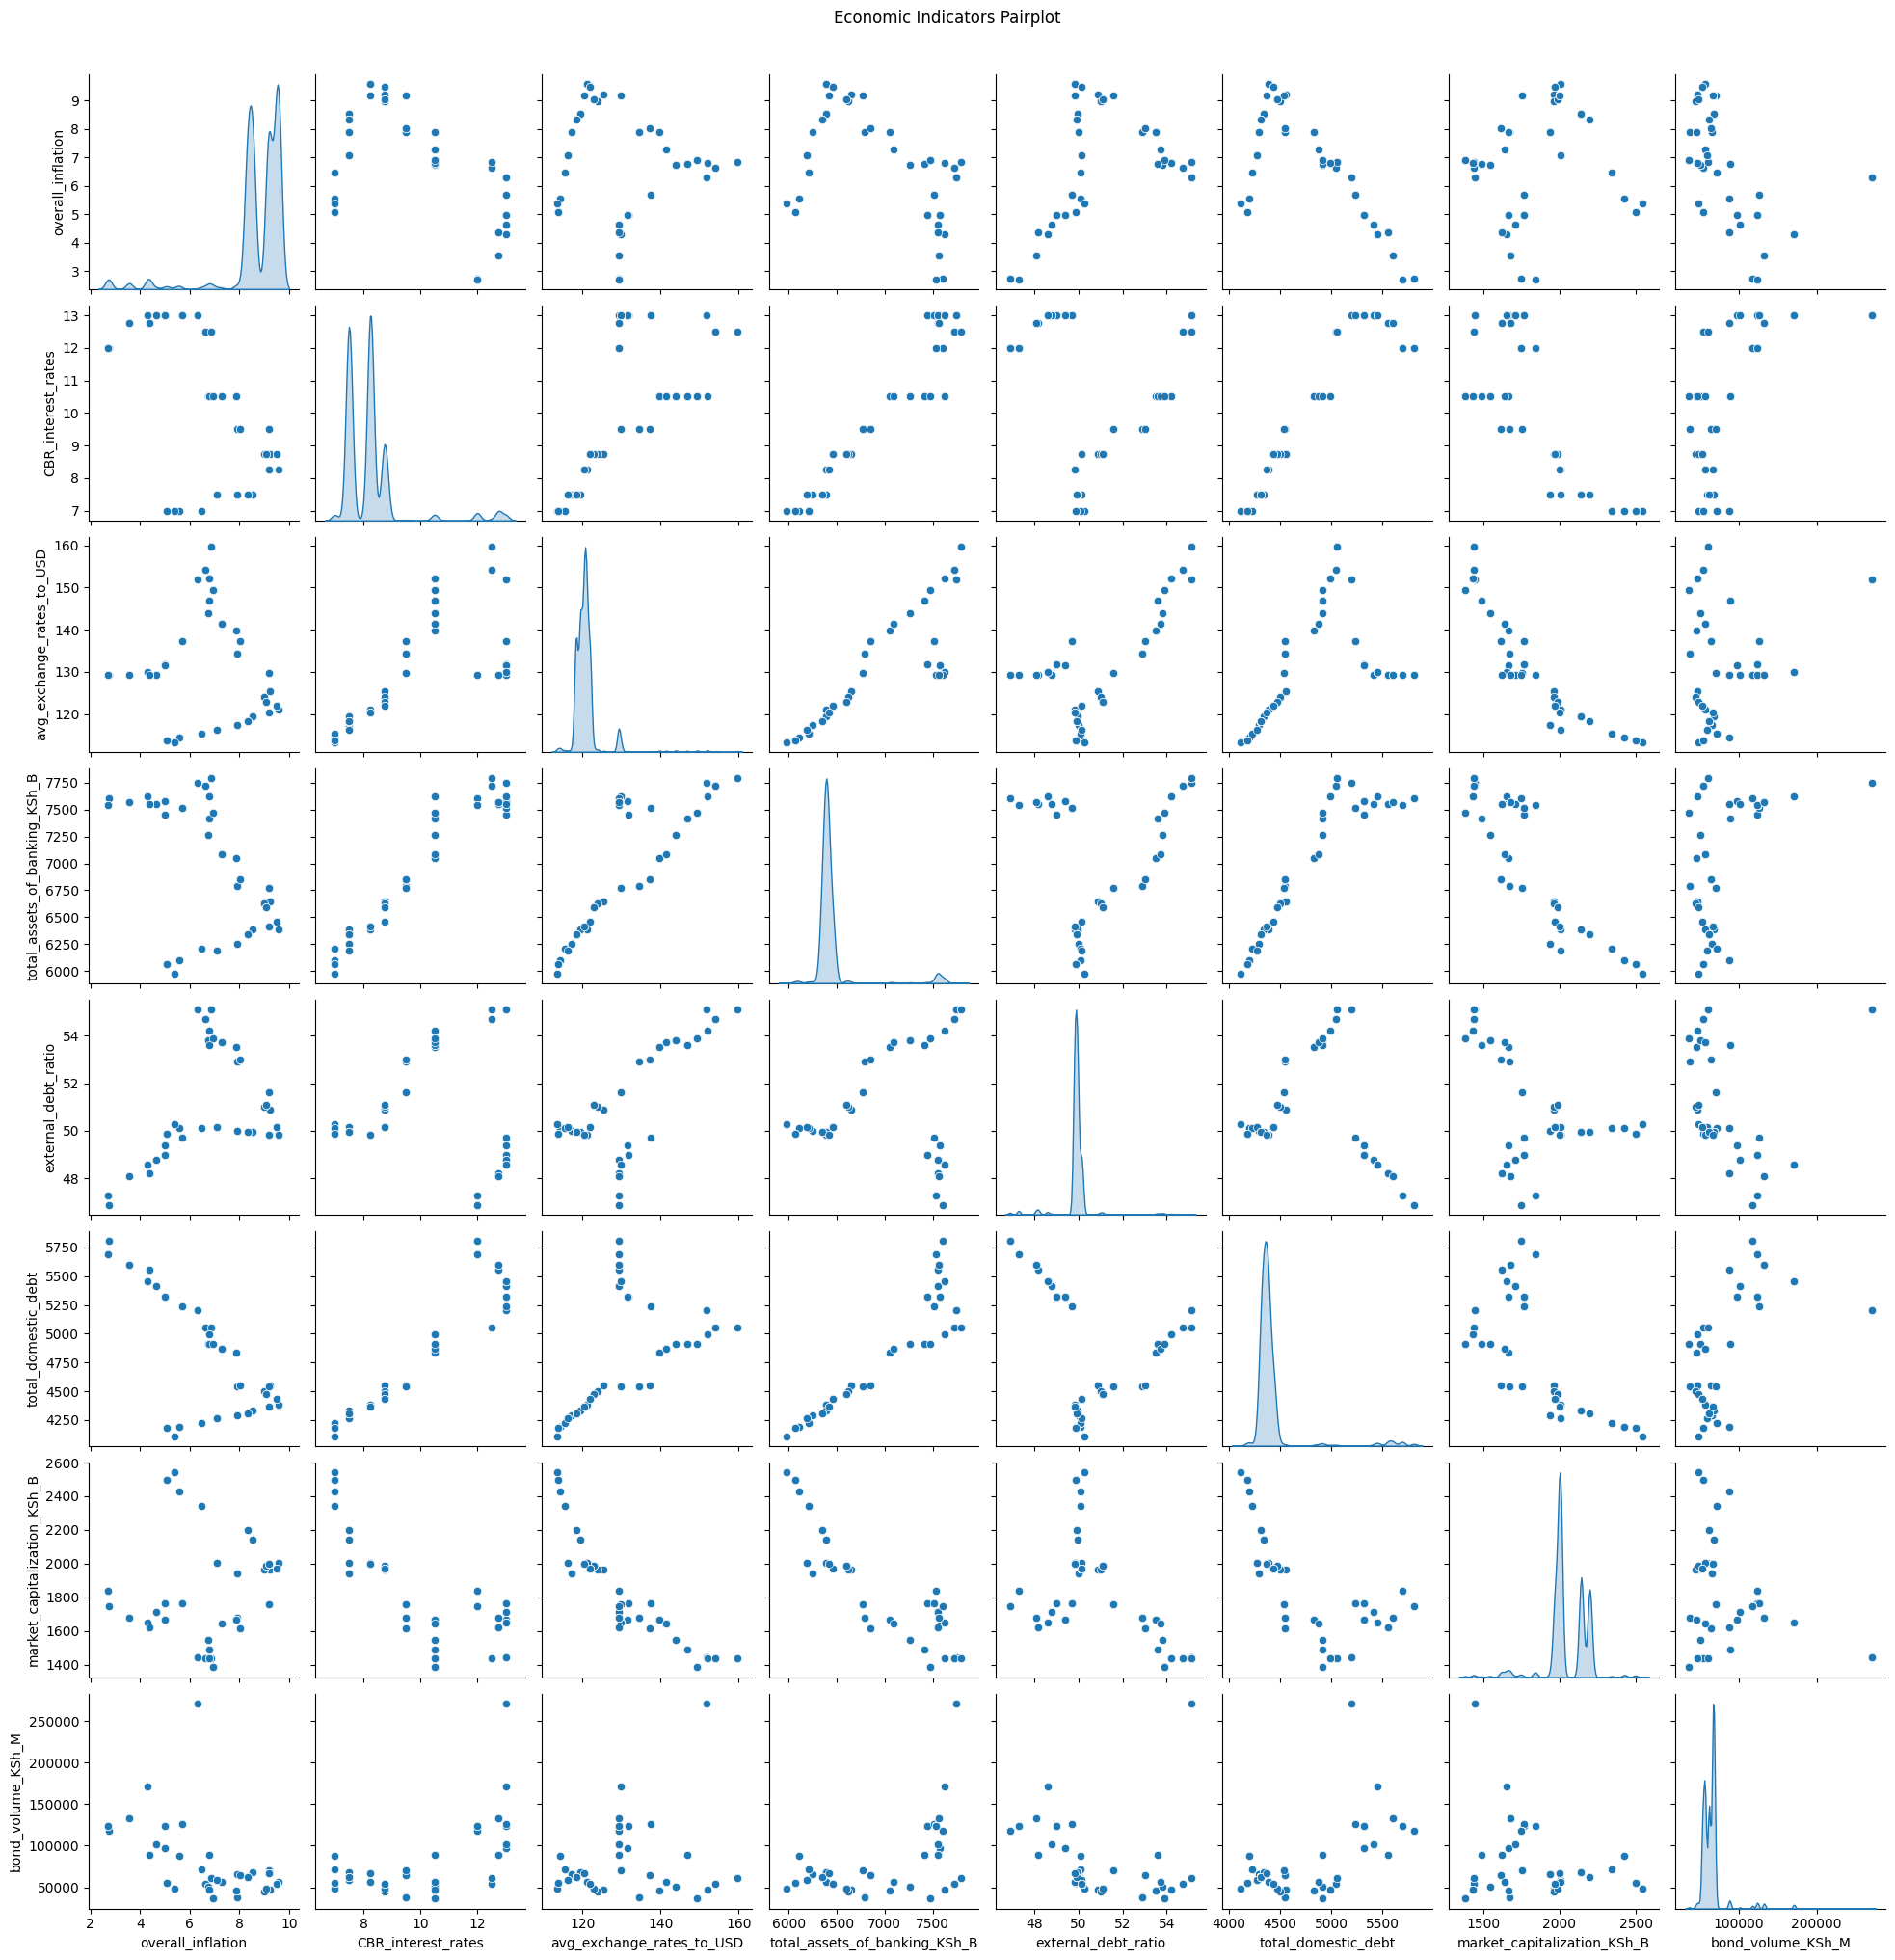

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

loan_cols = [
    'Total_Amount',
    'duration',
    'Amount_Funded_By_Lender',
    'avg_exchange_rates_to_USD',
    'total_assets_of_banking_KSh_B',
    'external_debt_ratio'
]

g1 = sns.pairplot(full[loan_cols], diag_kind='kde')
g1.fig.suptitle("Loan-related Variables Pairplot", y=1.02)
plt.show()

economic_cols = [
    'overall_inflation',
    'CBR_interest_rates',
    'avg_exchange_rates_to_USD',
    'total_assets_of_banking_KSh_B',
    'external_debt_ratio',
    'total_domestic_debt',
    'market_capitalization_KSh_B',
    'bond_volume_KSh_M'
]

g2 = sns.pairplot(full[economic_cols], diag_kind='kde')
g2.fig.suptitle("Economic Indicators Pairplot", y=1.02)
plt.show()

## **4.3 Correlation Matrix**

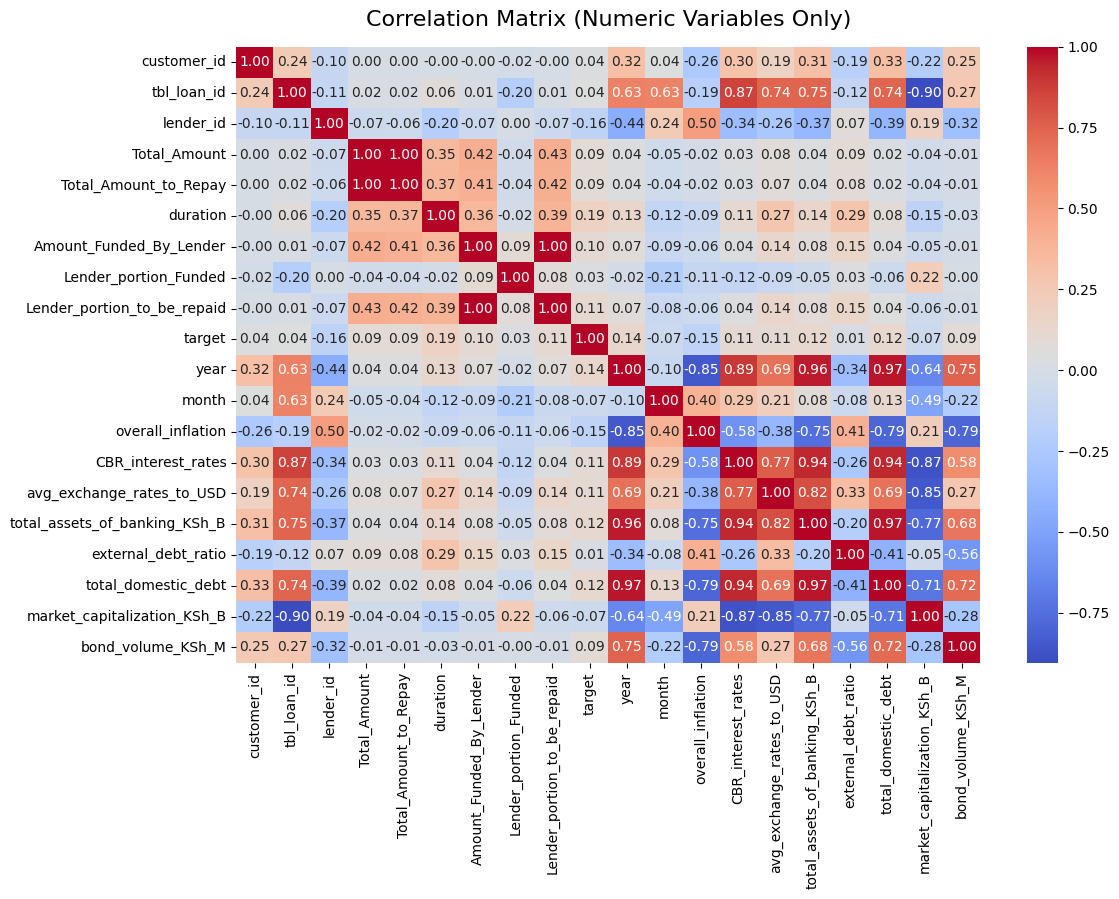

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric = full.select_dtypes(include=['float64', 'int64', 'int32'])

corr = numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix (Numeric Variables Only)", fontsize=16, pad=15)
plt.show()

## **4.4 Distribution**

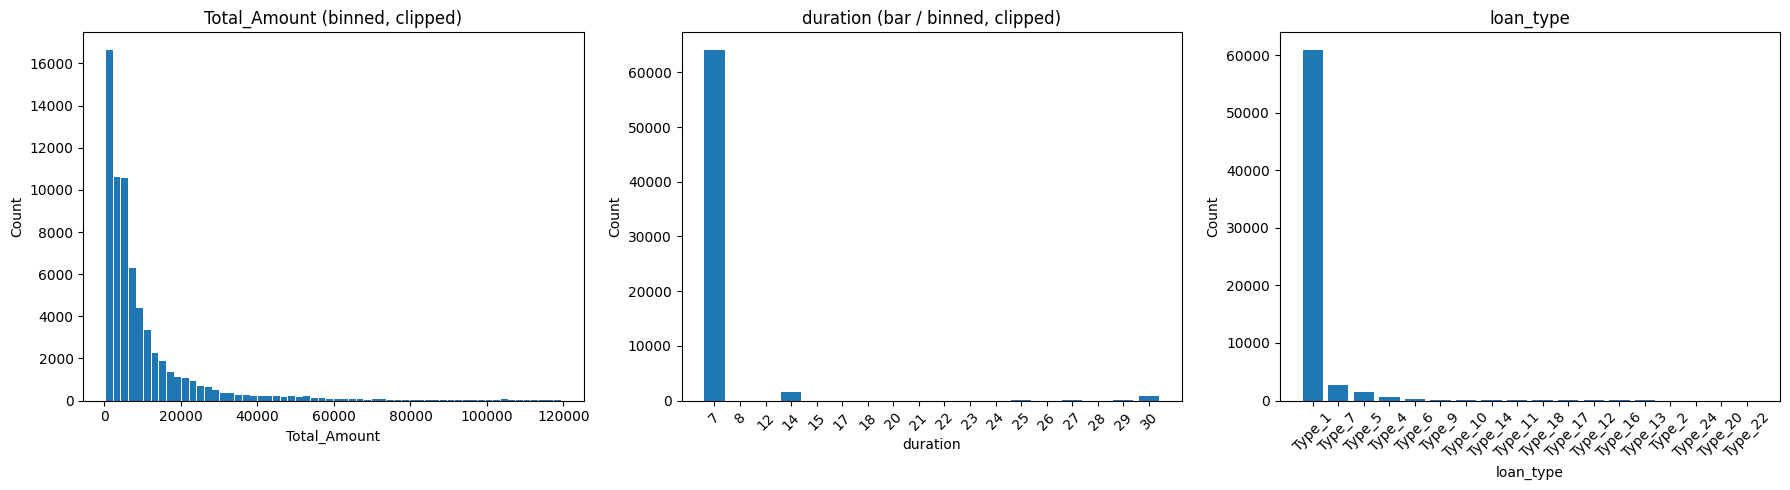


Target counts:
target
0    65610
1     1031
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

full = pd.read_csv('https://raw.githubusercontent.com/whkung0903/kenya-loan-credit-prediction/main/full.csv')

cols = ["Total_Amount", "duration", "loan_type", "target"]
df = full[cols].copy()

# filter extreme values
def clip_by_quantile(data: pd.DataFrame, col: str, low_q=0.01, high_q=0.99):
    x = pd.to_numeric(data[col], errors="coerce")
    lo, hi = x.quantile(low_q), x.quantile(high_q)
    return data[(x >= lo) & (x <= hi)]

df_f = df.copy()
for c in ["Total_Amount", "duration"]:
    df_f = clip_by_quantile(df_f, c, low_q=0.01, high_q=0.99)

# plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

## Total_Amount
x = pd.to_numeric(df_f["Total_Amount"], errors="coerce").dropna()
if len(x) > 0:
    q75, q25 = np.percentile(x, [75, 25])
    iqr = q75 - q25
    bin_width = 2 * iqr * (len(x) ** (-1/3)) if iqr > 0 else None
    bins = int(np.ceil((x.max() - x.min()) / bin_width)) if bin_width and bin_width > 0 else 30
    bins = max(10, min(bins, 60))

    counts, edges = np.histogram(x, bins=bins)
    mids = (edges[:-1] + edges[1:]) / 2
    axes[0].bar(mids, counts, width=(edges[1] - edges[0]) * 0.9)
axes[0].set_title("Total_Amount (binned, clipped)")
axes[0].set_xlabel("Total_Amount")
axes[0].set_ylabel("Count")

## duration
d = pd.to_numeric(df_f["duration"], errors="coerce").dropna()
if d.nunique() <= 30 and d.nunique() > 0:
    vc = d.value_counts().sort_index()
    axes[1].bar(vc.index.astype(str), vc.values)
    axes[1].tick_params(axis="x", rotation=45)
else:
    bins = 30
    counts, edges = np.histogram(d, bins=bins)
    mids = (edges[:-1] + edges[1:]) / 2
    axes[1].bar(mids, counts, width=(edges[1] - edges[0]) * 0.9)
axes[1].set_title("duration (bar / binned, clipped)")
axes[1].set_xlabel("duration")
axes[1].set_ylabel("Count")

## loan_type
loan_counts = df_f["loan_type"].astype("string").fillna("NaN").value_counts()
axes[2].bar(loan_counts.index.astype(str), loan_counts.values)
axes[2].set_title("loan_type")
axes[2].set_xlabel("loan_type")
axes[2].set_ylabel("Count")
axes[2].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

## target (only text)
print("\nTarget counts:")
print(df_f["target"].value_counts(dropna=False).sort_index())

## **4.5 Indication**
1. Most of economic factors increase / decrease over time.
> Use time-based splits (train on earlier periods, test on later periods)

2. Most of economic factors correlate to others.
> Prefer regularization (L2 / Elastic Net) for logistic regression

3. The dataset is highly imbalanced. Only 1% of loans are defaulted.
> Use Balanced Accuracy, class_weight='balanced'. Tune the decision threshold

4. Almost all loans' durations are 7-day.
> Consider dropping duration.


# **5. Preprocessing and Feature Engineering**

## **5.1 Train-Test Split**

In [ ]:
import pandas as pd
full = pd.read_csv('https://raw.githubusercontent.com/whkung0903/kenya-loan-credit-prediction/main/full.csv')

from sklearn.model_selection import train_test_split

# datetime
full["disbursement_date"] = pd.to_datetime(full["disbursement_date"], errors="coerce")
full = full.dropna(subset=["disbursement_date"]).sort_values("disbursement_date").reset_index(drop=True)

# split over time
X = full.drop("target", axis=1)
y = full["target"]

split_idx = int(len(full) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# check
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54892, 25), (13723, 25), (54892,), (13723,))

## **5.2 Preprocessing**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif

# Load data from GitHub
loan = pd.read_csv("https://raw.githubusercontent.com/whkung0903/kenya-loan-credit-prediction/main/loan_raw.csv")
economic = pd.read_csv("https://raw.githubusercontent.com/whkung0903/kenya-loan-credit-prediction/main/Kenya%20Monthly%20Economic%20Indicators.csv")
full = pd.read_csv("https://raw.githubusercontent.com/whkung0903/kenya-loan-credit-prediction/main/full.csv", parse_dates=["disbursement_date", "due_date"])

# Macroeconomic columns as they appear in full
macro_cols = [
    "overall_inflation",
    "CBR_interest_rates",
    "avg_exchange_rates_to_USD",
    "total_assets_of_banking_KSh_B",
    "external_debt_ratio",
    "total_domestic_debt",
    "market_capitalization_KSh_B",
    "bond_volume_KSh_M"
]

# sort by time
full = full.dropna(subset=["target", "disbursement_date"]).sort_values("disbursement_date").reset_index(drop=True)


# Forward-fill missing macro values
full[macro_cols] = full[macro_cols].ffill()

# Date-based features
full["Year"] = full["disbursement_date"].dt.year
full["Month"] = full["disbursement_date"].dt.month
full["DayOfWeek"] = full["disbursement_date"].dt.dayofweek
full["Loan_Age"] = (full["due_date"] - full["disbursement_date"]).dt.days

full["log_Total_Amount"] = np.log1p(full["Total_Amount"])
full["log_Amount_Funded"] = np.log1p(full["Amount_Funded_By_Lender"])
full["log_Total_Repay"] = np.log1p(full["Total_Amount_to_Repay"])

# split
y = full["target"]
categorical_cols = ["loan_type", "New_versus_Repeat", "country_id"]

numeric_cols = [ # drop duration
    "Total_Amount",
    "Total_Amount_to_Repay",
    "Amount_Funded_By_Lender",
    "Lender_portion_Funded",
    "Lender_portion_to_be_repaid",
    "Year",
    "Month",
    "DayOfWeek",
    "Loan_Age",
    "log_Total_Amount",
    "log_Amount_Funded",
    "log_Total_Repay"
] + macro_cols

X_base = full[categorical_cols + numeric_cols].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X_base, y, test_size=0.2, shuffle=False
)

# fit clustering
cluster_cols = ["Total_Amount", "Amount_Funded_By_Lender"] + macro_cols
scaler_cluster = StandardScaler()
Xc_train = scaler_cluster.fit_transform(X_train[cluster_cols])
Xc_test  = scaler_cluster.transform(X_test[cluster_cols])

kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
X_train["cluster_group"] = kmeans.fit_predict(Xc_train).astype(str)
X_test["cluster_group"]  = kmeans.predict(Xc_test).astype(str)

# update columns
categorical_cols = categorical_cols + ["cluster_group"]

# Preprocessing: one-hot encode categorical variables, scale numeric variables
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols),
    ]
)

## **5.3 Feature Engineering**

In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)

# Feature selector (to be used in pipelines)
selector = SelectKBest(score_func=f_classif, k=20)
selector.fit(X_train_processed, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [17 27] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SelectKBest(k=20)

In [ ]:
feature_names = preprocessor.get_feature_names_out()
len(feature_names), X_train_processed.shape[1]

(42, 42)

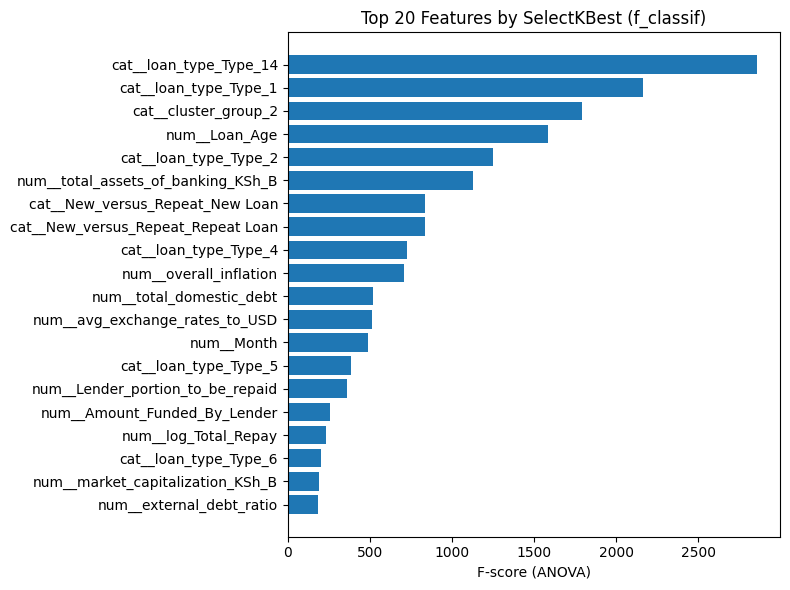

In [ ]:
import matplotlib.pyplot as plt

fs_df = pd.DataFrame({
    "feature": feature_names,
    "score": selector.scores_,
    "pvalue": selector.pvalues_,
})

# sort by score
fs_df_sorted = fs_df.sort_values("score", ascending=False)

# bar chart
top_k = 20
top_features = fs_df_sorted.head(top_k)

plt.figure(figsize=(8, 6))
plt.barh(top_features["feature"], top_features["score"])
plt.gca().invert_yaxis()
plt.xlabel("F-score (ANOVA)")
plt.title(f"Top {top_k} Features by SelectKBest (f_classif)")
plt.tight_layout()
plt.show()

**Interpretation**

Why those features impact more?

1. Loan Type
> Products with different target audience, interest rates, rule, etc. have various risks. For example, Type_4 looks like short-term, high risk and smaller amount, while Type_1 seems like prominent product.
2. cluster_group
> One of the groups could be small amount + high interest rates + high inflation, and another could be large amount + stable exchange rate + low inflation. If some clusters show higher ratio of default, it gains higher f_classif.
3. Time related features (Month, Loan_Age)
> Default rate could be related to prosperity, policies, central bank interest rate, and inflation.
4. Amount related features
> When amount increases, the paying pressure and risk rises accordingly.
5. Macroeconomic Indicators
> Default risk may rise because borrowers' pressure to repay increase due to inflation. Bank system indicators reflect overall funding environment and uncertainty.

## **5.4 Pipeline**

In [ ]:
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

set_config(display="diagram")

clf = LogisticRegression(max_iter=1000)

loan_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("selector", selector),
    ("classifier", clf),
])

loan_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['loan_type',
                                                   'New_versus_Repeat',
                                                   'country_id',
                                                   'cluster_group']),
                                                 ('num', StandardScaler(),
                                                  ['Total_Amount',
                                                   'Total_Amount_to_Repay',
                                                   'Amount_Funded_By_Lender',
                                                   'Lender_portion_Funded',
                                                   'Lender_portion_to_be_repaid',
                                                   'Year', 'Month', 'DayOfWeek',
                                                   'Loan_Age',
                                                   'log_Total_Amount',
                                                   'log_Amount_Funded',
                                                   'log_Total_Repay',
                                                   'overall_inflation',
                                                   'CBR_interest_rates',
                                                   'avg_exchange_rates_to_USD',
                                                   'total_assets_of_banking_KSh_B',
                                                   'external_debt_ratio',
                                                   'total_domestic_debt',
                                                   'market_capitalization_KSh_B',
                                                   'bond_volume_KSh_M'])])),
                ('selector', SelectKBest(k=20)),
                ('classifier', LogisticRegression(max_iter=1000))])

# **6. Model Training and Evaluation**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

def print_scores(y_test, y_pred): #This code is from lecture 12. where we have highly inbalanced datasets
  plt.rc("font", size=10)
  fig, ax = plt.subplots(figsize=(2.5, 2.5))
  cmd = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues, colorbar=False, ax=ax)
  plt.tight_layout()
  plt.show()
  accuracy = accuracy_score(y_test, y_pred)
  balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
  print(f'Accuracy={accuracy:.4f}, Balanced Accuracy={balanced_accuracy:.4f}')
  precision = precision_score(y_test, y_pred, pos_label= 1)
  recall = recall_score(y_test, y_pred, pos_label= 1)
  f1 = f1_score(y_test, y_pred, pos_label= 1)
  print(f'Precision={precision:.4f}, Recall={recall:.4f}, F1-score={f1:.4f}')

results = []

def collect_results(model_name, y_test, y_pred, y_prob=None):
    row = {
        "model": model_name,
        "accuracy": accuracy_score(y_test, y_pred),
        "balanced_accuracy": balanced_accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, pos_label=1),
        "recall": recall_score(y_test, y_pred, pos_label=1),
        "f1": f1_score(y_test, y_pred, pos_label=1),
        "auc": roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan
    }
    results.append(row)

## **6.1 Logistic Regression**

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [17 27] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Test Accuracy: 0.8945565838373534
Test AUC: 0.5253898498919671

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94     13190
           1       0.14      0.32      0.19       533

    accuracy                           0.89     13723
   macro avg       0.55      0.62      0.57     13723
weighted avg       0.94      0.89      0.91     13723



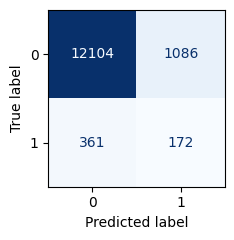

Accuracy=0.8946, Balanced Accuracy=0.6202
Precision=0.1367, Recall=0.3227, F1-score=0.1921


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

log_reg_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("select", selector),
    ("clf", LogisticRegression(max_iter=1000, solver="liblinear"))
])

log_reg_pipeline.fit(X_train, y_train)
y_pred = log_reg_pipeline.predict(X_test)
y_prob = log_reg_pipeline.predict_proba(X_test)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print_scores(y_test,y_pred)

collect_results("Logistic Regression", y_test, y_pred, y_prob)

## **6.2 KNeighborsClassifier**

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [17 27] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Test Accuracy: 0.961743059097865
Test AUC: 0.6225341985442949

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     13190
           1       0.67      0.03      0.06       533

    accuracy                           0.96     13723
   macro avg       0.81      0.51      0.52     13723
weighted avg       0.95      0.96      0.94     13723



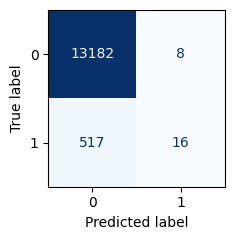

Accuracy=0.9617, Balanced Accuracy=0.5147
Precision=0.6667, Recall=0.0300, F1-score=0.0575


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("select", selector),
    ("clf", KNeighborsClassifier(n_neighbors=15,n_jobs= -1))
])

knn_pipe.fit(X_train, y_train)
y_pred = knn_pipe.predict(X_test)
y_prob = knn_pipe.predict_proba(X_test)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print_scores(y_test,y_pred) #Even though overall accuracy is high, prediction is still bad since it predicts "No" for most of the time.
collect_results("KNeighborsClassifier", y_test, y_pred, y_prob)

## **6.3 GaussianNB**

Test Accuracy: 0.6763098447861254
Test AUC: 0.768817698324531

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.67      0.80     13190
           1       0.10      0.87      0.17       533

    accuracy                           0.68     13723
   macro avg       0.54      0.77      0.49     13723
weighted avg       0.96      0.68      0.77     13723



/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [17 27] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


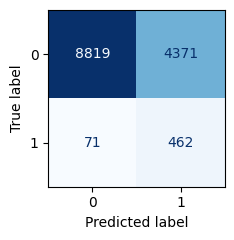

Accuracy=0.6763, Balanced Accuracy=0.7677
Precision=0.0956, Recall=0.8668, F1-score=0.1722


In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussian_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("select", selector),
    ("clf", GaussianNB())
])

gaussian_pipe.fit(X_train,y_train)
y_pred = gaussian_pipe.predict(X_test)
y_prob = gaussian_pipe.predict_proba(X_test)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print_scores(y_test,y_pred)
collect_results("GaussianNB", y_test, y_pred, y_prob)

## **6.4 DecisionTreeClassifier**

Test Accuracy: 0.9387888945565839
Test AUC: 0.5855817059657737

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     13190
           1       0.21      0.20      0.20       533

    accuracy                           0.94     13723
   macro avg       0.59      0.59      0.59     13723
weighted avg       0.94      0.94      0.94     13723



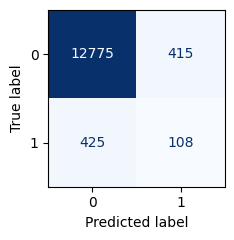

Accuracy=0.9388, Balanced Accuracy=0.5856
Precision=0.2065, Recall=0.2026, F1-score=0.2045


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", DecisionTreeClassifier(
        random_state=42,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1
    ))
])

dt_pipe.fit(X_train, y_train)

y_pred = dt_pipe.predict(X_test)
y_prob = dt_pipe.predict_proba(X_test)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print_scores(y_test, y_pred)
collect_results("Decision Tree Classifier", y_test, y_pred, y_prob)

## **6.5 RandomForestClassifier**

Random Forest - Test Accuracy: 0.9615973183706187
Random Forest - Test AUC: 0.8688003447947235

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     13190
           1       0.88      0.01      0.03       533

    accuracy                           0.96     13723
   macro avg       0.92      0.51      0.50     13723
weighted avg       0.96      0.96      0.94     13723



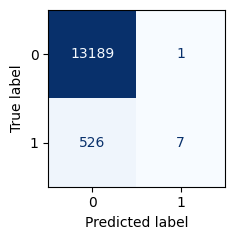

Accuracy=0.9616, Balanced Accuracy=0.5065
Precision=0.8750, Recall=0.0131, F1-score=0.0259


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])

rf_pipe.fit(X_train, y_train)

y_pred = rf_pipe.predict(X_test)
y_prob = rf_pipe.predict_proba(X_test)[:, 1]

print("Random Forest - Test Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest - Test AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print_scores(y_test, y_pred)
collect_results("Random Forest Classifier", y_test, y_pred, y_prob)

## **6.6 BaggingClassifier**

Bagging - Test Accuracy: 0.9568607447351162
Bagging - Test AUC: 0.878195858765026

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     13190
           1       0.37      0.17      0.23       533

    accuracy                           0.96     13723
   macro avg       0.67      0.58      0.60     13723
weighted avg       0.94      0.96      0.95     13723



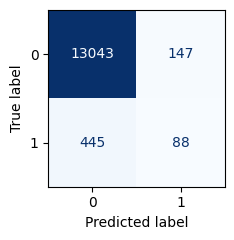

Accuracy=0.9569, Balanced Accuracy=0.5770
Precision=0.3745, Recall=0.1651, F1-score=0.2292


In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        n_estimators=100,
        max_samples=0.8,
        max_features=1.0,
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    ))
])

bagging_pipe.fit(X_train, y_train)

y_pred = bagging_pipe.predict(X_test)
y_prob = bagging_pipe.predict_proba(X_test)[:, 1]

print("Bagging - Test Accuracy:", accuracy_score(y_test, y_pred))
print("Bagging - Test AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print_scores(y_test, y_pred)
collect_results("Bagging Classifier", y_test, y_pred, y_prob)

## **6.7 Linear SVM**

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [17 27] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Linear SVM - Test Accuracy: 0.9613058369161263
Linear SVM - Test AUC: 0.7897477621769862

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     13190
           1       1.00      0.00      0.01       533

    accuracy                           0.96     13723
   macro avg       0.98      0.50      0.49     13723
weighted avg       0.96      0.96      0.94     13723



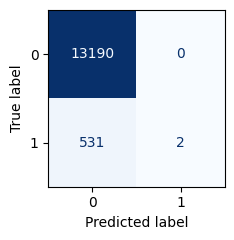

Accuracy=0.9613, Balanced Accuracy=0.5019
Precision=1.0000, Recall=0.0038, F1-score=0.0075


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

svm_linear = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("select", selector),
    ("clf", CalibratedClassifierCV(
        estimator=LinearSVC(class_weight="balanced", random_state=42),
        cv=3
    ))
])

svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(X_test)
y_prob = svm_linear.predict_proba(X_test)[:, 1]

print("Linear SVM - Test Accuracy:", accuracy_score(y_test, y_pred))
print("Linear SVM - Test AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print_scores(y_test, y_pred)
collect_results("Linear SVM", y_test, y_pred, y_prob)

## **6.8 GradientBoosting**

Gradient Boosting - Test Accuracy: 0.9506667638271515
Gradient Boosting - Test AUC: 0.8814320787110594

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     13190
           1       0.31      0.21      0.25       533

    accuracy                           0.95     13723
   macro avg       0.64      0.60      0.61     13723
weighted avg       0.94      0.95      0.95     13723



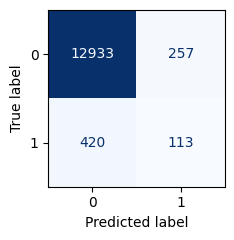

Accuracy=0.9507, Balanced Accuracy=0.5963
Precision=0.3054, Recall=0.2120, F1-score=0.2503


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        min_samples_split=2,
        min_samples_leaf=1,
        subsample=1.0,
        random_state=42
    ))
])

gb_pipe.fit(X_train, y_train)

y_pred = gb_pipe.predict(X_test)
y_prob = gb_pipe.predict_proba(X_test)[:, 1]

print("Gradient Boosting - Test Accuracy:", accuracy_score(y_test, y_pred))
print("Gradient Boosting - Test AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print_scores(y_test, y_pred)
collect_results("GradientBoosting", y_test, y_pred, y_prob)

## **6.9 Model Comparison**

In [ ]:
results_df = pd.DataFrame(results)

# sort by balanced_accuracy
results_df = results_df.sort_values(by="balanced_accuracy", ascending=False)

results_df
results_df.style.format({
    "accuracy": "{:.4f}",
    "balanced_accuracy": "{:.4f}",
    "precision": "{:.4f}",
    "recall": "{:.4f}",
    "f1": "{:.4f}",
    "auc": "{:.4f}",
})

,model,accuracy,balanced_accuracy,precision,recall,f1,auc
2,GaussianNB,0.6763,0.7677,0.0956,0.8668,0.1722,0.7688
0,Logistic Regression,0.8946,0.6202,0.1367,0.3227,0.1921,0.5254
7,GradientBoosting,0.9507,0.5963,0.3054,0.2120,0.2503,0.8814
3,Decision Tree Classifier,0.9388,0.5856,0.2065,0.2026,0.2045,0.5856
5,Bagging Classifier,0.9569,0.5770,0.3745,0.1651,0.2292,0.8782
1,KNeighborsClassifier,0.9617,0.5147,0.6667,0.0300,0.0575,0.6225
4,Random Forest Classifier,0.9616,0.5065,0.8750,0.0131,0.0259,0.8688
6,Linear SVM,0.9613,0.5019,1.0000,0.0038,0.0075,0.7897


**Selected Models for Stacking:**
> **GaussianNB, Logistic Regression, GradientBoosting**

Reason 1: Higher balanced_accuracy
* The 3 models show the highest balanced_accuracy, indicating higher recall for both categories.

Reason 2: Higher recall
* The 3 models show the highest recall as well, indicating they deal with True Positive well. KNN, RF, and SVM show extremely low recall, so we don't take them into consideration.

Reason 3: With close recall, GradientBoosting has higher AUC than Decision Tree

Reason 4: With close AUC, GradientBoosting has higher	recall than Bagging

**How they work together**
* NB boosts recall
* GB boosts discriminative power
* LR adds stability/calibration.

# **7. Hyperparameter Tuning and Stacking**

We chose **Random Search** because Grid Search was too slow and computationally expensive for our large dataset. Random Search let us explore the parameter space much more efficiently while still finding strong configurations within a reasonable runtime.

## **7.1 GaussianNB**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from scipy.stats import uniform
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

tscv = TimeSeriesSplit(n_splits=3)

param_distribs_gnb = [
    {
        "clf__var_smoothing": uniform(1e-12, 1e-8)
    }
]

gnb_random_search = RandomizedSearchCV(
    estimator=gaussian_pipe,
    param_distributions=param_distribs_gnb,
    n_iter=10,
    cv=tscv,
    scoring="balanced_accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=1,
    refit=True,
)

gnb_random_search.fit(X_train, y_train)

best_gnb = gnb_random_search.best_estimator_
gnb_random_search.best_params_, gnb_random_search.best_score_

cv_df = pd.DataFrame(gnb_random_search.cv_results_)
cols = [c for c in cv_df.columns if c.startswith("param_")] + [
    "mean_test_score",
    "std_test_score",
    "rank_test_score",
]
cv_df = cv_df[cols].sort_values("mean_test_score", ascending=False)
cv_df.head(10)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [17 27] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,param_clf__var_smoothing,mean_test_score,std_test_score,rank_test_score
0,3.746401e-09,0.567031,0.032064,1
1,9.508143e-09,0.567031,0.032064,1
2,7.320939e-09,0.567031,0.032064,1
3,5.987585e-09,0.567031,0.032064,1
4,1.561186e-09,0.567031,0.032064,1
5,1.560945e-09,0.567031,0.032064,1
6,5.818361e-10,0.567031,0.032064,1
7,8.662761e-09,0.567031,0.032064,1
8,6.012150e-09,0.567031,0.032064,1
9,7.081726e-09,0.567031,0.032064,1


## **7.2 Logistic Regression**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from scipy.stats import loguniform

tscv = TimeSeriesSplit(n_splits=3)

param_distribs_logreg = [
    {
        "clf__C": loguniform(0.0001, 10000),
        "clf__penalty": ["l1", "l2"],
        "clf__class_weight": [None, "balanced"]
    }
]

logreg_random_search = RandomizedSearchCV(
    estimator=log_reg_pipeline,
    param_distributions=param_distribs_logreg,
    n_iter=10,
    cv=tscv,
    scoring="balanced_accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=1,
    refit=True,
)

logreg_random_search.fit(X_train, y_train)

best_logreg = logreg_random_search.best_estimator_
logreg_random_search.best_params_, logreg_random_search.best_score_

cv_df = pd.DataFrame(logreg_random_search.cv_results_)
cols = [c for c in cv_df.columns if c.startswith("param_")] + [
    "mean_test_score",
    "std_test_score",
    "rank_test_score",
]
cv_df = cv_df[cols].sort_values("mean_test_score", ascending=False)
cv_df.head(10)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [17 27] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,param_clf__C,param_clf__class_weight,param_clf__penalty,mean_test_score,std_test_score,rank_test_score
6,456.605487,balanced,l2,0.704092,0.156006,1
8,0.027161,balanced,l1,0.690570,0.107065,2
4,6.440508,balanced,l1,0.680720,0.140892,3
1,71.771419,None,l1,0.588265,0.059327,4
9,0.285470,None,l1,0.568060,0.059129,5
5,0.000146,balanced,l2,0.547303,0.025091,6
3,0.000292,balanced,l1,0.541622,0.024446,7
0,0.099156,None,l1,0.535087,0.038995,8
7,0.002848,None,l1,0.503869,0.005472,9
2,0.001771,None,l1,0.501265,0.001789,10


## **7.3 GradientBoosting**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from scipy.stats import randint, uniform
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier

tscv = TimeSeriesSplit(n_splits=3)

param_distribs_gb = [
    {
        "clf__n_estimators": randint(100, 600),
        "clf__learning_rate": uniform(0.01, 0.19),
        "clf__max_depth": randint(2, 6),
        "clf__subsample": uniform(0.6, 0.4),
        "clf__min_samples_split": randint(2, 50),
        "clf__min_samples_leaf": randint(1, 30),
        "clf__max_features": [None, "sqrt", "log2"],
    }
]

gb_random_search = RandomizedSearchCV(
    estimator=gb_pipe,
    param_distributions=param_distribs_gb,
    n_iter=10,
    cv=tscv,
    scoring="balanced_accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=1,
    refit=True,
)

gb_random_search.fit(X_train, y_train)

best_gb = gb_random_search.best_estimator_
gb_random_search.best_params_, gb_random_search.best_score_

cv_df = pd.DataFrame(gb_random_search.cv_results_)
cols = [c for c in cv_df.columns if c.startswith("param_")] + [
    "mean_test_score",
    "std_test_score",
    "rank_test_score",
]
cv_df = cv_df[cols].sort_values("mean_test_score", ascending=False)
cv_df.head(10)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


,param_clf__learning_rate,param_clf__max_depth,param_clf__max_features,param_clf__min_samples_leaf,param_clf__min_samples_split,param_clf__n_estimators,param_clf__subsample,mean_test_score,std_test_score,rank_test_score
2,0.144534,3,None,2,25,591,0.975421,0.825020,0.025315,1
7,0.190288,5,sqrt,18,10,445,0.639069,0.736912,0.017995,2
8,0.140004,4,log2,12,9,530,0.669346,0.714516,0.056540,3
1,0.094708,4,log2,11,25,472,0.840446,0.711078,0.036456,4
9,0.084302,3,sqrt,6,43,359,0.673942,0.585879,0.047717,5
4,0.092070,2,log2,27,43,575,0.989502,0.561849,0.045812,6
6,0.098685,2,log2,7,22,428,0.626021,0.550948,0.035536,7
3,0.010148,5,None,1,13,413,0.809903,0.537330,0.022615,8
0,0.081163,2,log2,11,9,288,0.838740,0.536565,0.024789,9
5,0.054227,3,log2,19,45,154,0.993292,0.524979,0.026950,10


## **7.4 Stack models after Tuning**

**Why not Voting?**

Voting doesn't learn model weights: It simply averages predictions, while stacking learns which models are more reliable through a meta-learner.
Weak models can hurt the ensemble: Models like KNN and GaussianNB performed poorly, and voting treats all models equally, reducing overall performance.
Limited performance gain: Voting rarely outperforms the strongest individual models, especially when top models already perform well.

**Why using LogReg as meta model?**

Logistic regression is a more stable model than GaussianNB and GradientBoosting. GaussianNB may not capture the full complexity of interaction between features, leading to suboptimal predictions. GradientBoosting could be very sensitive to noise in the data since it is a nonlinear model. Also, it may lead to overfitting if used as meta model because the stacking model would overly rely on the fine variations.

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import StratifiedKFold

inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

estimators = [
    ("gnb", best_gnb),
    ("logreg", best_logreg),
    ("gb", best_gb),
]

# meta-model = LogisticRegression
meta_model = LogisticRegression(max_iter=3000, class_weight="balanced", solver="liblinear")

stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_model,
    stack_method="predict_proba",
    cv=inner_cv,
    n_jobs=-1,
    passthrough=False
)


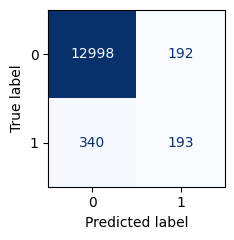

Accuracy=0.9612, Balanced Accuracy=0.6738
Precision=0.5013, Recall=0.3621, F1-score=0.4205
Test AUC: 0.5611293022885322

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     13190
           1       0.50      0.36      0.42       533

    accuracy                           0.96     13723
   macro avg       0.74      0.67      0.70     13723
weighted avg       0.96      0.96      0.96     13723



In [ ]:
stack_clf.fit(X_train, y_train)

y_pred = stack_clf.predict(X_test)
y_prob = stack_clf.predict_proba(X_test)[:, 1]

print_scores(y_test, y_pred)
collect_results("Stacking (GNB + LogReg + GB)", y_test, y_pred, y_prob)

print("Test AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# **8. Threshold Tuning**
Assumed cost matrix:
| Cost matrix    | **Predicted -** | **Predicted +** |
|----------------|-----------------|-----------------|
| **Actual -**   | 0               | 1               |
| **Actual +**   | 5               | 0               |

In [ ]:
# cost function
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, confusion_matrix

FN_COST = 5
FP_COST = 1

def default_cost(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    fn = cm[1, 0]
    fp = cm[0, 1]
    return fn * FN_COST + fp * FP_COST

# scorer
scorer = make_scorer(default_cost, greater_is_better=False)

In [ ]:
# TunedThresholdClassifierCV
from sklearn.model_selection import TimeSeriesSplit, TunedThresholdClassifierCV

inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

tuned_threshold_model = TunedThresholdClassifierCV(
    estimator=stack_clf,
    scoring=scorer,
    cv=inner_cv,
    store_cv_results=True
)

tuned_threshold_model.fit(X_train, y_train)

cost_after_tuning = default_cost(y_test, tuned_threshold_model.predict(X_test))
print(f"Cost AFTER threshold tuning (test): {cost_after_tuning}")
print(f"Optimal threshold: {tuned_threshold_model.best_threshold_:.4f}")

Cost AFTER threshold tuning (test): 1932
Optimal threshold: 0.9396


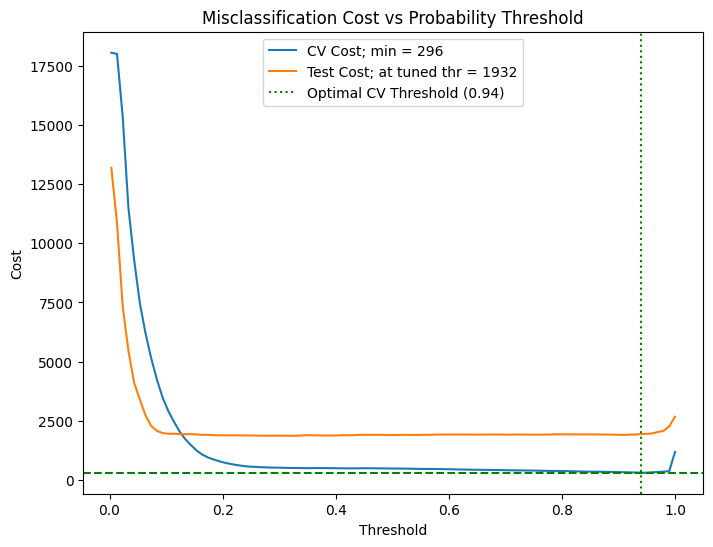

In [ ]:
# visualization
from sklearn.model_selection import FixedThresholdClassifier
from sklearn.frozen import FrozenEstimator
from sklearn.model_selection import StratifiedKFold

# tuned_threshold_model.cv_results_
thresholds = tuned_threshold_model.cv_results_["thresholds"]
cv_costs = -tuned_threshold_model.cv_results_["scores"]  # transform to positive

ix = np.argmin(cv_costs)
opt_thresh_cv = thresholds[ix]
min_cost_cv = cv_costs[ix]

# Freeze one fitted estimator
frozen_stack = FrozenEstimator(stack_clf.fit(X_train, y_train))

test_costs = [
    default_cost(y_test, FixedThresholdClassifier(estimator=frozen_stack, threshold=t).predict(X_test))
    for t in thresholds
]

opt_cost_test_at_cv_thresh = test_costs[ix]

plt.figure(figsize=(8, 6))
plt.plot(thresholds, cv_costs, label=f'CV Cost; min = {min_cost_cv:.0f}')
plt.plot(thresholds, test_costs, label=f'Test Cost; at tuned thr = {opt_cost_test_at_cv_thresh:.0f}')

plt.axvline(opt_thresh_cv, 0, 1, ls=':', color='green', label=f'Optimal CV Threshold ({opt_thresh_cv:.2f})')
plt.axhline(min_cost_cv, xmin=0, xmax=1, ls='--', color='green')

plt.xlabel('Threshold')
plt.ylabel('Cost')
plt.title('Misclassification Cost vs Probability Threshold')
plt.legend()
plt.show()

**Indications**

Due to the highly imbalanced data, lower threshold lead to large amount of False Positive, sharply increasing total cost. Therefore, under the strategy of minimizing costs, we adopt a very conservative strategy with high threshold of 0.94.

# **9. Final Evaluation**

In [ ]:
final_predictions = tuned_threshold_model.predict(X_test)

final_cost = default_cost(y_test, final_predictions)
print(f"Cost of tuned-threshold model (test): {final_cost}")

from sklearn.metrics import balanced_accuracy_score
print("Balanced Accuracy:", balanced_accuracy_score(y_test, final_predictions))
print("Best threshold:", tuned_threshold_model.best_threshold_)

Cost of tuned-threshold model (test): 1932
Balanced Accuracy: 0.6535423959534983
Best threshold: 0.9395856963391475


In [ ]:
# save
import joblib

final_model = tuned_threshold_model
joblib.dump(final_model, "kenya_loan_prediction.pkl")

['kenya_loan_prediction.pkl']

In [ ]:
# bootstrap
import numpy as np
import pandas as pd
from sklearn.metrics import balanced_accuracy_score, recall_score, precision_score, f1_score

final_model = tuned_threshold_model

B = 1000
rng = np.random.default_rng(42)
n = len(y_test)

rows = []
for b in range(B):
    idx = rng.integers(0, n, size=n)
    Xb = X_test.iloc[idx] if hasattr(X_test, "iloc") else X_test[idx]
    yb = y_test.iloc[idx] if hasattr(y_test, "iloc") else y_test[idx]

    y_pred_b = final_model.predict(Xb)

    rows.append({
        "cost": default_cost(yb, y_pred_b),
        "balanced_accuracy": balanced_accuracy_score(yb, y_pred_b),
        "recall": recall_score(yb, y_pred_b, pos_label=1),
        "precision": precision_score(yb, y_pred_b, pos_label=1),
        "f1": f1_score(yb, y_pred_b, pos_label=1),
    })

boot_df = pd.DataFrame(rows)

def ci(x, lo=2.5, hi=97.5):
    return np.percentile(x, [lo, hi])

summary = pd.DataFrame({
    "metric": ["cost", "balanced_accuracy", "recall", "precision", "f1"],
    "mean": [boot_df[m].mean() for m in ["cost","balanced_accuracy","recall","precision","f1"]],
    "ci_low": [ci(boot_df[m])[0] for m in ["cost","balanced_accuracy","recall","precision","f1"]],
    "ci_high": [ci(boot_df[m])[1] for m in ["cost","balanced_accuracy","recall","precision","f1"]],
})

summary

,metric,mean,ci_low,ci_high
0,cost,1930.723000,1743.975000,2123.000000
1,balanced_accuracy,0.653997,0.634564,0.673606
2,recall,0.316104,0.277482,0.355274
3,precision,0.611774,0.557554,0.665400
4,f1,0.416537,0.375900,0.456176


**Indication**

A conservative default-flagging strategy: precision is relatively high while recall is lower, and the cost metric remains within a consistent range across resamples. This suggests that the threshold-tuned model’s cost reduction is not driven by a lucky split, but is reasonably stable under repeated sampling.

# **10. Challenges and Next Steps**

###**10.1 Estimated Cost Matrix**

Our cost matrix was constructed using reasonable estimates rather than verified operational or financial data. While this allowed us to approximate asymmetric penalties and explore cost-sensitive learning, the model's optimization is ultimately constrained by the accuracy of these assumptions. Incorporating real cost information would likely shift decision boundaries and improve practical relevance.


###**10.2 Data Quality Issues**

The dataset exhibited noticeable variance and potential outliers that influenced model stability. Although preprocessing steps mitigated some noise, residual anomalies may have skewed decision thresholds or reduced the model's ability to generalize. More thourough data cleaning and adding relevant features from multiple data sources would improve model reliability.


###**10.3 Model Complexity and Generalization Trade-offs**

While more flexible models can fit the training data more closely, they also increase the risk of overfitting. Our chosen models balanced complexity and interpretability, but constraints in hyperparameter tuning and cross-validation resources may have left performance gains unexplored. Trying additional model types and more time for tuning would achieve better generalization to new data.


###**10.4 Evaluation Limitations**

The evaluation framework relied on static train-test splits and a limited set of metrics. As a result, the model's performance on the test dataset may not fully reflect how the model would behave in real-world conditions. Future evaluations using additional tests or more varied metrics could provide a more cohesive picture of the model performance.


###**10.5 Hyperparameter Tuning Search Limitations**

Our ability to perform extensive hyperparameter tuning was limited because grid search could not run efficiently on the full dataset. The large data size and high time complexity of search methods made it impractical to explore broader parameter ranges. As a result, the final model may not reflect the best possible configuration. Additional tuning with optimized search strategies or better computational resources could improve the model.


# **11. Conclusion**

This project developed a machine-learning model to predict credit-card loan defaults using the Zindi dataset. After preprocessing and model selection, the final model achieved a **balanced accuracy of 0.65**, reflecting *moderate* ability to separate defaulters from non-defaulters despite dataset noise and feature limitations. Performance on the positive (default) class shows the expected trade-off for imbalanced credit-risk problems: recall was 0.32, indicating the model misses some true defaulters, while precision reached 0.61, meaning that when the model predicts a default, it is often correct. The resulting F1 score of 0.42 highlights the difficulty of consistently identifying high-risk borrowers in this dataset.

Using a cost-sensitive evaluation, the model achieved an average expected cost of 1930.72, with confidence bounds indicating stable performance across folds. While the cost matrix was based on estimated rather than real operational values, it still helped align the model with the financial implications of misclassification and provided a practical decision-making perspective.

Overall, this project shows both the potential and the complexity of applying machine learning to credit-risk problems. Future improvements such as more advanced feature engineering, real-world cost data, and more extensive hyperparameter tuning could further enhance predictive accuracy and reduce expected financial loss.

Throughout the project, we learned several skills and insights that are valuable in real-world machine-learning practice. We gained hands-on experience with cleaning noisy tabular data, handling outliers, and designing features that improve model understanding. We also deepened our understanding of how model evaluation must go beyond accuracy in high-stakes settings by comparing different metrics, exploring class imbalance, and applying cost-sensitive decision making. Finally, the project reinforced the importance of interpretability, fairness, and stakeholder alignment whenever ML models influence financial decisions.

# **12. References**

**Boston University.** (2025). *BA810 Lecture Slides: Machine Learning & Credit Risk Modeling.*  
Available at: https://drive.google.com/drive/folders/1ii1rNMwMp5jrtP49gSGGgTfGxHsOzTwt

**DataCamp.** (2025). *Ensemble Methods in Python.*  
Retrieved from https://app.datacamp.com/learn/courses/ensemble-methods-in-python

**Boston University.** (2025). *Lab 4: Evaluating Classifiers Using Cost* (Google Colab notebook).  
Available at: https://colab.research.google.com/drive/1xNfrI6cnj4vJdsvKpGvBK4nUXhdKgfLu?usp=sharing

**Boston University.** (2025). *Lab 6: End-to-End Machine Learning Project* (Google Colab notebook).  
Available at: https://colab.research.google.com/drive/19shYZItJEvoAut1xV7ZBOjQx0N51VIvc?usp=sharing


#**13. Generative AI Disclosure**

We used ChatGPT to support our project in the following ways:

*   **Clarifying Concepts and Debugging:** We used generative AI tools to help explain machine-learning concepts and interpret error messages. The guidance supported our learning but did not replace our own analytical work
*   **Improving Code Readability and Efficiency:** AI tools were occasionally used to suggest cleaner or more efficient versions of code we had already written. All suggested code was reviewed and modified by our team to ensure alignment with project requirements
*   **Refining Written Documentation:** We used AI assistance to help polish grammar for the written sections of the notebook. All final text reflects our team's understanding and was edited to ensure accuracy and consistency with our results

All AI-assisted content was carefully reviewed, modified, and finalized by our team to ensure originality, accuracy, and full compliance with academic integrity guidelines.